In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image Segmentation with Python and Unsupervised Learning
========================================================

In [6]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D

Load image from file and display it.

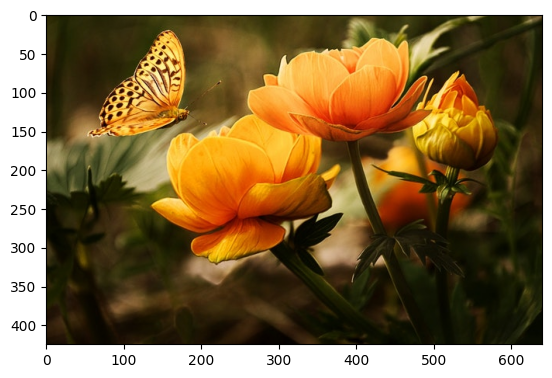

In [34]:
# Specify the path to the image
image_path = '/content/drive/MyDrive/butterfly.jpg'

# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('on')  # Hide the axes
plt.show()

Display image.

In [13]:
# Convert the image to a NumPy array
image_array = np.array(image)

# Display the image type, dimensions and mode
print(f"Array Type: {type(image_array)}")  # Type of the array
print(f"Dimensions: {image.size}")  # Width, Height
print(f"Mode: {image.mode}")  # Color mode

Array Type: <class 'numpy.ndarray'>
Dimensions: (640, 425)
Mode: RGB


Flatten image, and display in 3-D color space.

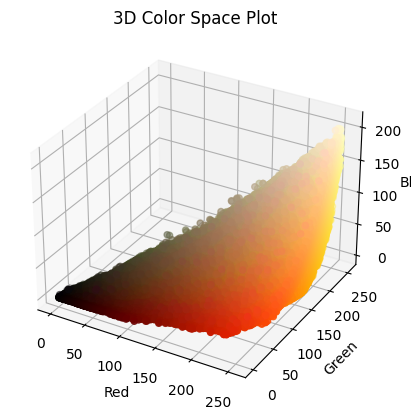

In [14]:
# Flatten the image array
flattened_array = image_array.reshape((-1, 3))

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting RGB channels
R = flattened_array[:, 0]
G = flattened_array[:, 1]
B = flattened_array[:, 2]

# Plotting
ax.scatter(R, G, B, c=flattened_array / 255.0, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('3D Color Space Plot')

# Display the plot
plt.show()

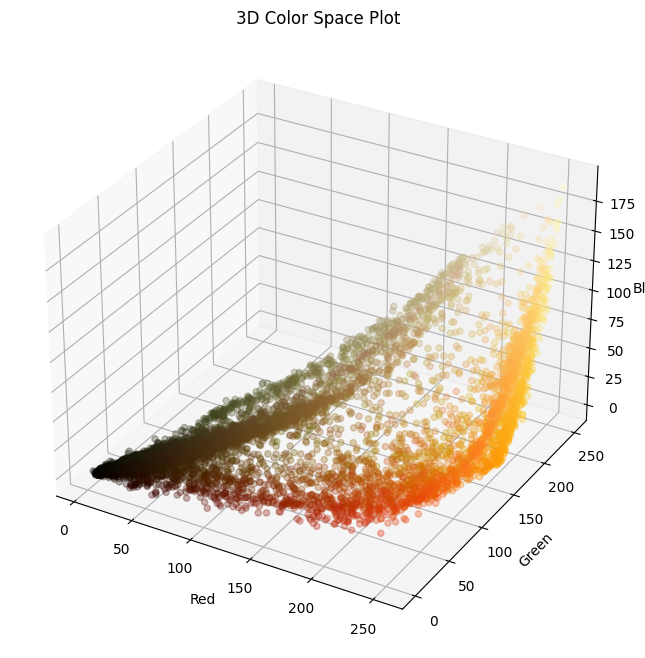

In [15]:
# Sample a subset of pixels
sample_size = 10000  # Adjust this number based on your needs
indices = np.random.choice(flattened_array.shape[0], sample_size, replace=False)
sample = flattened_array[indices]

# Creating a 3D plot
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.scatter(sample[:, 0], sample[:, 1], sample[:, 2], c=sample / 255.0, alpha=0.3, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title('3D Color Space Plot')

# Display the plot
plt.show()

K-means.

In [16]:
!pip install numpy matplotlib scikit-learn pillow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


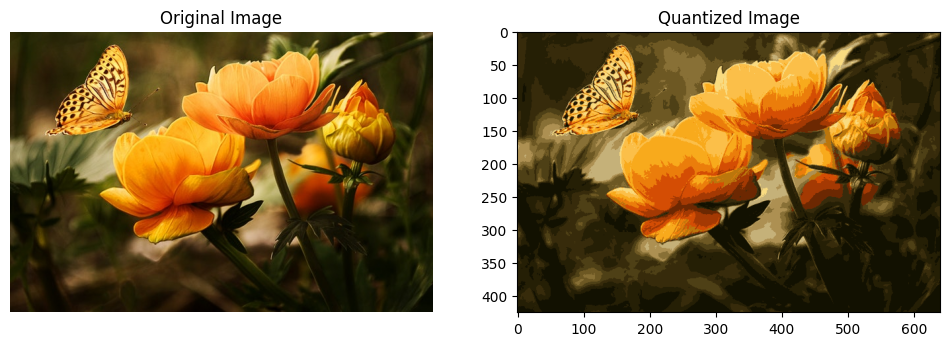

In [33]:
from sklearn.cluster import KMeans

# Convert the image to a NumPy array and normalize it
image_array = np.array(image) / 255.0

# Reshape the image array into a 2D array where each row is a pixel
pixels = image_array.reshape(-1, 3)
# Define the number of clusters (colors)
num_colors = 16  # You can adjust this number based on your needs

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(pixels)

# Replace each pixel's color with the color of its closest cluster center
quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the quantized pixels array back into the original image shape
quantized_image = quantized_pixels.reshape(image_array.shape)

# Plotting the original and the quantized image
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
ax[0].imshow(image_array)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(quantized_image)
ax[1].set_title('Quantized Image')
ax[1].axis('on')

plt.show()

Plotting cluster centers in RGB space.

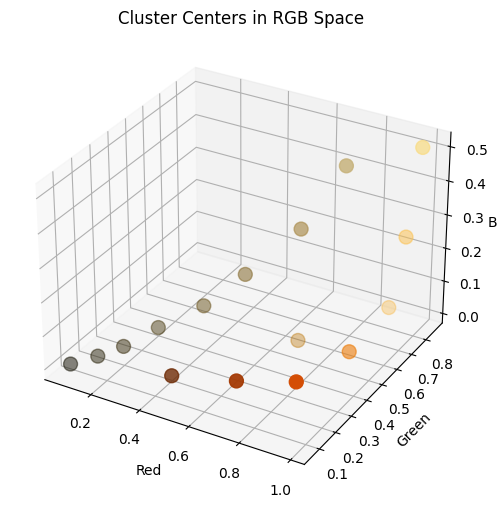

In [27]:
# Extract the cluster centers
centers = kmeans.cluster_centers_

# Creating a 3D plot for cluster centers
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c=centers, marker='o', s=100)
ax.set_title('Cluster Centers in RGB Space')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()

Plot segmented image.

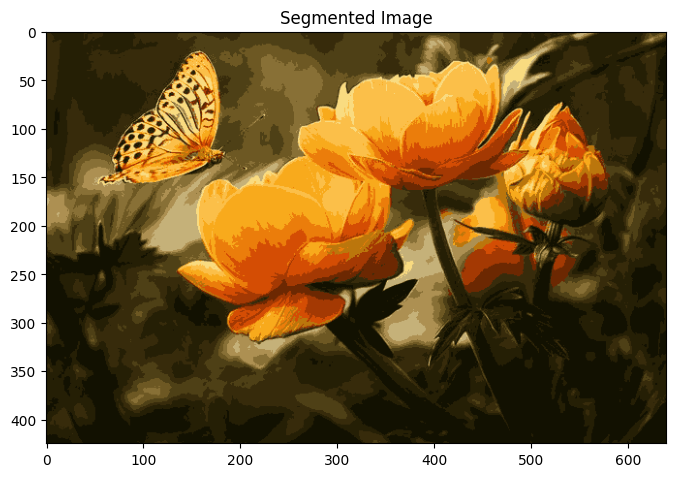

In [32]:
# Replace each pixel's color with the color of its closest cluster center
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the segmented pixels array back into the original image shape
segmented_image = segmented_pixels.reshape(image_array.shape)

# Displaying the segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('on')  # Hide the axes
plt.show()

Elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

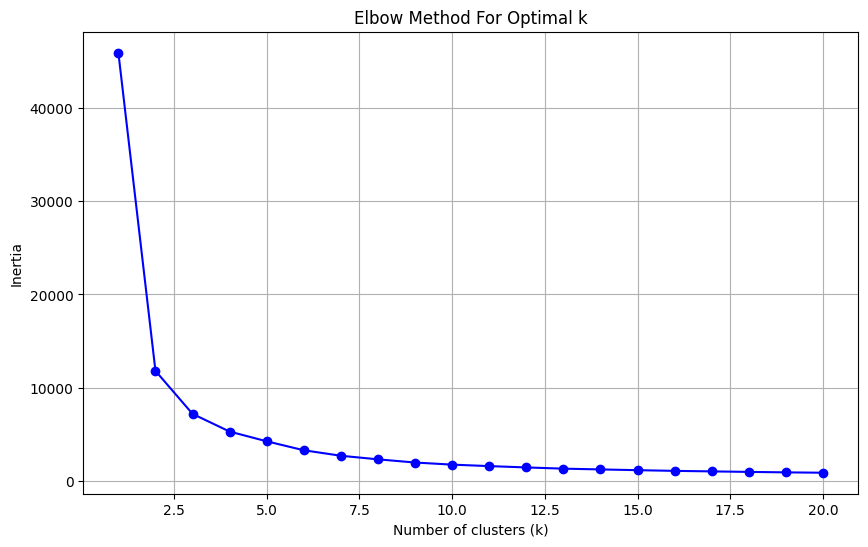

In [35]:
# List to store the sum of squared distances of samples to their closest cluster center
inertia = []

# Range of values for the number of clusters
k_values = range(1, 21)  # Testing from 1 to 20 clusters

# Calculating the inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()